<div style="float: right;" markdown="1">
    <img src="../material/figures/leastaction.png">
</div>
Para el problema de un resorte con una masa en el extremo de 0.2 Kg y una constante elástica $k=0.8$ N/m, defina una función en Python que mininimize la acción


$$S=\int_{t_1}^{t_2} L\, {\rm d}t $$
entre $t_1=\pi/8$ y $t_2=3\pi/8$ que corresponden a elongaciones $x_{\text{ini}}=0.70710678118654757$ m y $x_{\text{end}}=x_{\text{ini}}$ m

y donde 

$$L(x,\dot{x})=T(t)-V(t)$$

con
$$T=\frac12 m v^2\,,\qquad V=\frac12 k x^2\,$$

Para la trayectoria que minimize la acción encuentre y grafique  todas la cantidades físicas como velocidad, aceleración y energía.


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import interpolate
from scipy.misc import derivative

In [3]:
def S(x,t1=np.pi/8,t2=3*np.pi/8,m=0.2,k=0.8,xini=0.70710678118654757,xend=0.70710678118654757):
    x=np.asarray(x)
    t=np.linspace(t1,t2,x.shape[0])
    Dt=t[1]-t[0]
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return  (( 0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*k*(   0.5*(x[1:]+x[:-1])   )**2 )*Dt).sum()
    #v=(x[1:]-x[:-1])/( t[1:]-t[:-1] )
    #trange=0.5*(t[1:]+t[:-1])  # can be also evaluated at t[1:] or t[:-1]
    #return integrate.trapz( 0.5*m*v**2-0.5*k*(   0.5*(x[1:]+x[:-1])   )**2 , trange )

La solución analítica corresponde a la ecuación de movimiento:
$$x=\sin(\omega t)/2$$
y será usada para comparar con el resultado numérico obtenido

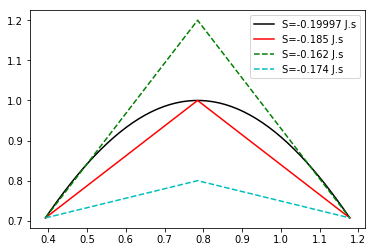

In [4]:
xmin=0.70710678118654757
xmax=xmin
tmin=np.pi/8;tmax=3*np.pi/8
m=0.2
k=0.8
ω=np.sqrt(k/m)
t=np.linspace(tmin,tmax)

plt.plot(t,sin(ω*t),'k-', label='S={} J.s'.format(round( S( sin(ω*t) ),5 ) )  )

tt=np.array( [tmin,2*tmin,3*tmin])
X=np.array( [xmin,1,xmax])
plt.plot(tt,X,'r-',label='S={} J.s'.format(round( S(X),3 ) ) )

X=np.array( [xmin,1.2,xmax])
plt.plot(tt,X,'g--',label='S={} J.s'.format(round( S(X),3 ) ) )

X=np.array( [xmin,0.8,xmax])
plt.plot(tt,X,'c--',label='S={} J.s'.format(round( S(X),3 ) ) )



plt.legend(loc='best')

In [5]:
def xfit(n,t1=np.pi/8,t2=3*np.pi/8,m=0.2,k=0.8,xini=0.70710678118654757,xend=0.70710678118654757,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)

    :Parameters:

    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.

    :Returns: (x,xmax,Smin)
    
    x: ndarray
        minimizer of the action S(x)
        
    xini:
    
    xend:

    xmax: number
        Maximum height for the object

    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    import scipy.optimize as optimize
    #t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    a=optimize.fmin_powell(S,x0,args=(t1,t2,m,k,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt  

In [6]:
Smin=xfit(51,t1=np.pi/8,t2=3*np.pi/8,m=0.2,k=0.8,xini=0.70710678118654757,xend=0.70710678118654757,ftol=1E-6)

Optimization terminated successfully.
         Current function value: -0.199974
         Iterations: 64
         Function evaluations: 32066


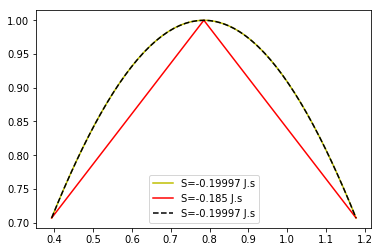

In [7]:
xmin=0.70710678118654757
xmax=xmin
tmin=np.pi/8;tmax=3*np.pi/8

m=0.2
k=0.8
ω=np.sqrt(k/m)
t=np.linspace(tmin,tmax)

plt.plot(t,sin(ω*t),'y-', label='S={} J.s'.format(round( S( sin(ω*t) ),5 ) )  )
X=np.array( [xmin,1,xmax])
tt=np.array( [np.pi/8,np.pi/4,np.pi/8+np.pi/4])
plt.plot(tt,X,'r-',label='S={} J.s'.format(round( S(X),3 ) ) )

t=np.linspace(tmin,tmax,Smin[0].shape[0])
plt.plot(t,Smin[0],'k--', label='S={} J.s'.format(round( Smin[2] ,5 ) )  )

plt.legend(loc='best')

Equation of motion

In [8]:
x=Smin[0]

for

In [9]:
t=np.linspace(tmin,tmax,Smin[0].shape[0])

In [10]:
def derivate(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    from scipy.misc import derivative
    try:
        nn=np.array(x0).shape[0] # force error if float is used 
        fp=np.vectorize(derivative)
    except IndexError:
        fp=derivative
        
    return fp(func,x0,**kwargs)



def interpol1d_to_function(x0,x=[0,1,2],y=[0,1,2],full_range=False):
    '''
    Converts interpolation to function
    '''
    return interpolate.interp1d(x,y)(x0)

In [11]:
x.shape,t.shape

((51,), (51,))

In [12]:
tavg=0.5*(t[1:]+t[:-1])
xavg=0.5*(x[1:]+x[:-1])

In [13]:
def Y(xx):
    return interpol1d_to_function(xx,t,x)

In [14]:
v=derivate(Y,tavg,dx=1E-6)

In [15]:
E=0.5*m*v**2+0.5*k*xavg**2
E

array([ 0.39985953,  0.39984749,  0.39985763,  0.3998457 ,  0.39984897,
        0.39984727,  0.39984723,  0.3998489 ,  0.39984774,  0.39984946,
        0.39984875,  0.39984953,  0.3998494 ,  0.39984952,  0.3998496 ,
        0.39984955,  0.39984967,  0.39984962,  0.39984968,  0.39984963,
        0.39984964,  0.39984959,  0.3998496 ,  0.39984963,  0.39984963,
        0.39984963,  0.39984963,  0.39984975,  0.39984976,  0.39984955,
        0.39984957,  0.39984926,  0.39984926,  0.39985097,  0.39985098,
        0.39984836,  0.39984839,  0.39984611,  0.39984611,  0.39985736,
        0.39985736,  0.39985112,  0.39985112,  0.39983962,  0.39983962,
        0.39984599,  0.39984599,  0.39985989,  0.39985516,  0.39985517])

In [17]:
tpavg=0.5*(tavg[1:]+tavg[:-1])
xpavg=0.5*(xavg[1:]+xavg[:-1])

In [18]:
def Y(xx):
    return interpol1d_to_function(xx,tavg,v)

In [19]:
a=derivate(Y,tpavg,dx=1E-6)

$\omega^2=-a/x$

In [24]:
ω**2

4.0

In [25]:
-a/xpavg

array([ 4.00384403,  3.99674356,  4.00386907,  3.99892387,  4.00057013,
        4.00001362,  3.99941265,  4.00042042,  3.99935043,  4.00027949,
        3.99967687,  4.00005971,  3.99994145,  3.999961  ,  4.00002761,
        3.99992639,  4.00003862,  3.9999509 ,  4.00004568,  3.99998345,
        4.00006482,  3.99998883,  3.99992221,  4.00000587,  3.99992156,
        4.00001006,  4.00029585,  4.00001859,  3.99973623,  4.00001922,
        3.99972679,  3.99999932,  4.00113165,  4.00000639,  3.99858417,
        4.00001272,  3.99893989,  3.99999993,  4.00464793,  4.00000001,
        3.99764861,  4.        ,  3.99595114,  4.        ,  4.00213185,
        4.        ,  4.00450912,  3.99848053,  4.00000309])

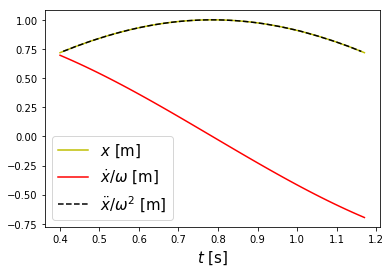

In [26]:
plt.plot(tavg,xavg,'y-',label=r'$x$ [m]')
plt.plot(tavg,v/ω,'r-',label=r'$\dot{x}/\omega$ [m]')
#plt.plot(tavg,E,'b--',label=r'E')
plt.plot(tpavg,-a/ω**2,'k--',label=r'$\ddot{x}/\omega^2$ [m]')
plt.legend(loc='best',fontsize=15) 
plt.xlabel(r'$t$ [s]',size=15 )

(0, 1)

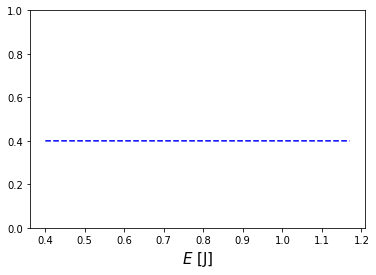

In [27]:
plt.plot(tavg,E,'b--')
plt.xlabel(r'$t$ [s]',size=15 )
plt.xlabel(r'$E$ [J]',size=15 )
plt.ylim(0,1)

##  Appendix:

### Starting at time 0s

In [28]:
S?

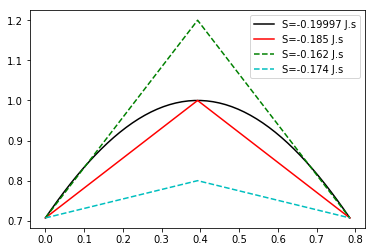

In [29]:
xmin=0.70710678118654757
xmax=xmin
tmin=0;tmax=np.pi/4
m=0.2
k=0.8
ω=np.sqrt(k/m)
t=np.linspace(tmin,tmax)

plt.plot(t,sin(ω*(t+ np.pi/8)) ,'k-', label='S={} J.s'.format(round( S( sin(ω*(t+ np.pi/8)),t1=0,t2=np.pi/4 ),5 ) )  )

tt=np.array( [tmin,np.pi/8,np.pi/4])
X=np.array( [xmin,1,xmax])
plt.plot(tt,X,'r-',label='S={} J.s'.format(round( S(X,t1=0,t2=np.pi/4),3 ) ) )

X=np.array( [xmin,1.2,xmax])
plt.plot(tt,X,'g--',label='S={} J.s'.format(round( S(X,t1=0,t2=np.pi/4),3 ) ) )

X=np.array( [xmin,0.8,xmax])
plt.plot(tt,X,'c--',label='S={} J.s'.format(round( S(X, t1=0,t2=np.pi/4),3 ) ) )



plt.legend(loc='best')

In [203]:
def interpol1d_to_function(x0,x=[0,1,2],y=[0,1,2],full_range=False):
    '''
    Converts interpolation to function
    #Returns the evaluation of the interpolated function(*args,**kwargs)
    #in an array x0 even when some value inside 
    '''
    #try:
    #if True:
    return interpolate.interp1d(x,y)(x0)
    #except ValueError:
    #    return 0

    
m=0.2
k=0.8
ω=np.sqrt(k/m)
    
#x=[xini,1,xend]
#if True:    
#    t1=np.pi/8;t2=3*np.pi/8;m=0.2;k=0.8;xini=0.70710678118654757;xend=0.70710678118654757    
def S(x,t1=np.pi/8,t2=3*np.pi/8,m=0.2,k=0.8,xini=0.70710678118654757,xend=0.70710678118654757):    
    x=np.asarray(x)
    t=np.linspace(t1,t2,x.shape[0])
    def X(t0):
        return interpol1d_to_function(t0,t,x)
    
    t0=0.5*(t[1:]+t[:-1])
    SS=integrate.trapz( 0.5*m*derivate(X,t0,dx=1E-6 )**2-0.5*k*X(t0)**2,t0 )
    return SS